# Target Market Analysis

## Investment Analysis

### House pricing increase compare

In [2]:
import pandas as pd

def loader(ticker='SPX'):
    return pd.read_csv('/Users/bichengwang/Documents/codes/python-notebook/src/finance/data/{} GOOGLEFINANCE.csv'.format(ticker.upper()))

df = loader()
# Now df contains your data with the 'date' column parsed as datetime objects
print(df.head())

                 Date   Close
0   1/5/1990 16:00:00  352.20
1  1/12/1990 16:00:00  339.93
2  1/19/1990 16:00:00  339.15
3  1/26/1990 16:00:00  325.80
4   2/2/1990 16:00:00  330.92


In [3]:
import numpy as np

In [4]:
df['Diff'] = df['Close'] - df['Close'].shift(1)
# 300, 310, 305 -> 
# NaN, 300, 310 -> 
# agent() -> 

def buy_and_sell(df, annual_risk_free_rate=0.06, span=4):
    # span lookback weeks
    # risk free rate
    df['Moving_Average'] = df['Close'].rolling(window=span).mean()
    df['EMA'] = df['Close'].ewm(span=span, adjust=False).mean()
    df['Mark'] = df['Close'] > df['EMA']
    marks = df['Mark'].values
    curr = marks[0]
    prices = df['Close'].values
    spx_returns = (df['Close'] / prices[0]).values
    base = 1.
    share = 0.
    security_returns = []
    strategy = []
    ### buy in strategy
    for mark, price in zip(marks, prices):
        if mark != curr:
            if not mark:
                share += base / price
                base = 0.
                strategy.append('Buy')
            else:
                base += share * price
                share = 0.
                strategy.append('Sell')
        else:
            strategy.append('Hold')
        curr = mark
        security_returns.append(base + share * price)
    ratio = (base + share * prices[-1]) / (prices[-1] / prices[0])

    # Calculate the mean returns
    security_mean_return = np.mean(security_returns)
    spx_mean_return = np.mean(spx_returns)

    # Calculate the covariance and variance of returns
    covariance = np.cov(security_returns, spx_returns)[0, 1]
    variance_spx = np.var(spx_returns)

    # Calculate beta
    beta = covariance / variance_spx

    # Calculate alpha
    alpha = security_mean_return - (beta * spx_mean_return)

    # Calculate the excess return of the security over the risk-free rate
    # Sample weekly returns of the security and risk-free rate
    annual_security_returns =  np.array([y/x for x, y in zip(security_returns[:-52], security_returns[52:])])

    # Calculate the excess return of the security over the risk-free rate
    excess_returns = annual_security_returns - annual_risk_free_rate

    # Calculate the annualized average excess return
    annualized_excess_return = np.mean(excess_returns)  # Approximate number of weeks in a year

    # Calculate the annualized standard deviation of returns
    annualized_std_dev = np.std(annual_security_returns) # Approximate number of weeks in a year

    # Calculate the annual Sharpe Ratio
    annual_sharpe_ratio = annualized_excess_return / annualized_std_dev

    def calculate_maximum_withdrawal_rate(weekly_returns, target_years, tolerance=1e-6):
        withdrawal_rate = 0.01  # Starting withdrawal rate
        while True:
            # Calculate portfolio balance after target_years with current withdrawal rate
            balance = calculate_portfolio_balance(weekly_returns, withdrawal_rate)
            if balance > 0:  # If portfolio lasts for target_years, reduce withdrawal rate
                withdrawal_rate += tolerance
            else:  # If portfolio doesn't last, return previous withdrawal rate
                return withdrawal_rate - tolerance

    return {
        'ratio':ratio, 
        'origin':(prices[-1]/prices[0]), 
        'value':security_returns[-1],
        'beta': beta, 
        'alpha': alpha,
        'annual_sharp_ratio': annual_sharpe_ratio,
        'latest_recommand': strategy[-10:]
    }


print(df.tail(20))
print(buy_and_sell(df.iloc[12:]))



                     Date    Close    Diff
1776  12/22/2023 16:00:00  4754.63   35.44
1777  12/29/2023 16:00:00  4769.83   15.20
1778    1/5/2024 16:00:00  4697.24  -72.59
1779   1/12/2024 16:00:00  4783.83   86.59
1780   1/19/2024 16:00:00  4839.81   55.98
1781   1/26/2024 16:00:00  4890.97   51.16
1782    2/2/2024 16:00:00  4958.61   67.64
1783    2/9/2024 16:00:00  5026.61   68.00
1784   2/16/2024 16:00:00  5005.57  -21.04
1785   2/23/2024 16:00:00  5088.80   83.23
1786    3/1/2024 16:00:00  5137.08   48.28
1787    3/8/2024 16:00:00  5123.69  -13.39
1788   3/15/2024 16:00:00  5117.09   -6.60
1789   3/22/2024 16:00:00  5234.18  117.09
1790   3/28/2024 16:00:00  5254.35   20.17
1791    4/5/2024 16:00:00  5204.34  -50.01
1792   4/12/2024 16:00:00  5123.41  -80.93
1793   4/19/2024 16:00:00  4967.23 -156.18
1794   4/26/2024 16:00:00  5099.96  132.73
1795    5/3/2024 16:00:00  5127.79   27.83
{'ratio': 0.32983918700009845, 'origin': 15.084397246572925, 'value': 4.975425324196137, 'beta': 

/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_41216/1730280971.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Moving_Average'] = df['Close'].rolling(window=span).mean()
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_41216/1730280971.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA'] = df['Close'].ewm(span=span, adjust=False).mean()
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_41216/1730280971.py:11: SettingWithCopyWarning: 
A value is trying to be 

In [5]:
{'ratio': 0.2009051019811337, 'origin': 15.002529858210272, 'value': 3.014084791138738, 'beta': 0.11909202741528965, 'alpha': 1.3269781290650928, 'annual_sharp_ratio': 9.085094808947634, 'latest_recommand': ['Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Sell', 'Hold', 'Buy']}
{'ratio': 0.33163908828838556, 'origin': 15.002529858210272, 'value': 4.975425324196137, 'beta': 0.32595653823983367, 'alpha': 0.746708608850416, 'annual_sharp_ratio': 8.676340962574303, 'latest_recommand': ['Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Buy', 'Hold', 'Sell']}



{'ratio': 0.33163908828838556,
 'origin': 15.002529858210272,
 'value': 4.975425324196137,
 'beta': 0.32595653823983367,
 'alpha': 0.746708608850416,
 'annual_sharp_ratio': 8.676340962574303,
 'latest_recommand': ['Hold',
  'Hold',
  'Hold',
  'Hold',
  'Hold',
  'Hold',
  'Hold',
  'Buy',
  'Hold',
  'Sell']}

In [6]:
df = loader('TQQQ')

In [7]:
df['Diff'] = df['Close'] - df['Close'].shift(1)

def hold_no_sell(df, annual_risk_free_rate=0.06, span=4):
    # span lookback weeks
    # risk free rate
    df['Moving_Average'] = df['Close'].rolling(window=span).mean()
    df['EMA'] = df['Close'].ewm(span=span, adjust=False).mean()
    df['Mark'] = df['Close'] > df['EMA']
    marks = df['Mark'].values
    curr = marks[0]
    prices = df['Close'].values
    spx_returns = (df['Close'] / prices[0]).values
    base = 1.
    share = 0.
    security_returns = []
    strategy = []
    ### buy in strategy
    for mark, price in zip(marks, prices):
        if mark != curr:
            if not mark:
                share += base / price
                base = 0.
                strategy.append('Buy')
            else:
                base += share * price
                share = 0.
                strategy.append('Sell')
        else:
            strategy.append('Hold')
        curr = mark
        security_returns.append(base + share * price)
    ratio = (base + share * prices[-1]) / (prices[-1] / prices[0])

    # Calculate the mean returns
    security_mean_return = np.mean(security_returns)
    spx_mean_return = np.mean(spx_returns)

    # Calculate the covariance and variance of returns
    covariance = np.cov(security_returns, spx_returns)[0, 1]
    variance_spx = np.var(spx_returns)

    # Calculate beta
    beta = covariance / variance_spx

    # Calculate alpha
    alpha = security_mean_return - (beta * spx_mean_return)

    # Calculate the excess return of the security over the risk-free rate
    # Sample weekly returns of the security and risk-free rate
    annual_security_returns =  np.array([y/x for x, y in zip(security_returns[:-52], security_returns[52:])])

    # Calculate the excess return of the security over the risk-free rate
    excess_returns = annual_security_returns - annual_risk_free_rate

    # Calculate the annualized average excess return
    annualized_excess_return = np.mean(excess_returns)  # Approximate number of weeks in a year

    # Calculate the annualized standard deviation of returns
    annualized_std_dev = np.std(annual_security_returns) # Approximate number of weeks in a year

    # Calculate the annual Sharpe Ratio
    annual_sharpe_ratio = annualized_excess_return / annualized_std_dev

    def calculate_maximum_withdrawal_rate(weekly_returns, target_years, tolerance=1e-6):
        withdrawal_rate = 0.01  # Starting withdrawal rate
        while True:
            # Calculate portfolio balance after target_years with current withdrawal rate
            balance = calculate_portfolio_balance(weekly_returns, withdrawal_rate)
            if balance > 0:  # If portfolio lasts for target_years, reduce withdrawal rate
                withdrawal_rate += tolerance
            else:  # If portfolio doesn't last, return previous withdrawal rate
                return withdrawal_rate - tolerance

    return {
        'ratio':ratio, 
        'origin':(prices[-1]/prices[0]), 
        'value':security_returns[-1],
        'beta': beta, 
        'alpha': alpha,
        'annual_sharp_ratio': annual_sharpe_ratio,
        'latest_recommand': strategy[-10:]
    }


print(df.tail(20))
print(buy_and_sell(df.iloc[12:]))



                    Date  Close  Diff
723  12/22/2023 16:00:00  50.35  1.11
724  12/29/2023 16:00:00  50.70  0.35
725    1/5/2024 16:00:00  45.98 -4.72
726   1/12/2024 16:00:00  50.34  4.36
727   1/19/2024 16:00:00  54.54  4.20
728   1/26/2024 16:00:00  55.44  0.90
729    2/2/2024 16:00:00  57.24  1.80
730    2/9/2024 16:00:00  60.27  3.03
731   2/16/2024 16:00:00  57.41 -2.86
732   2/23/2024 16:00:00  59.62  2.21
733    3/1/2024 16:00:00  63.13  3.51
734    3/8/2024 16:00:00  60.06 -3.07
735   3/15/2024 16:00:00  57.76 -2.30
736   3/22/2024 16:00:00  62.63  4.87
737   3/28/2024 16:00:00  61.56 -1.07
738    4/5/2024 16:00:00  59.86 -1.70
739   4/12/2024 16:00:00  58.72 -1.14
740   4/19/2024 16:00:00  49.48 -9.24
741   4/26/2024 16:00:00  55.28  5.80
742    5/3/2024 16:00:00  56.70  1.42
{'ratio': 0.07915371322276353, 'origin': 118.12500000000001, 'value': 9.350032374438943, 'beta': 0.07161197762916727, 'alpha': 2.9955889329097336, 'annual_sharp_ratio': 3.072658621435376, 'latest_recomm

/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_41216/1730280971.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Moving_Average'] = df['Close'].rolling(window=span).mean()
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_41216/1730280971.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA'] = df['Close'].ewm(span=span, adjust=False).mean()
/var/folders/ls/5qzq87350jz6pv6jwnpg6mkm0000gn/T/ipykernel_41216/1730280971.py:11: SettingWithCopyWarning: 
A value is trying to be 

### Martingale scenarios

In [75]:
def martingale(asset=100., price=1, length=10, cardinal_num = 0.5):
    """
    asset: 1.0
    price: ticker current price
    length: martingale length
    """
    probabilities = [0.5]
    for i in range(1, length):
        probabilities.append(probabilities[-1] * 0.5)
    per_time_allocated = asset / length
    prices = [price]
    for i in range(1, length):
        prices.append(prices[-1] * cardinal_num)
    per_time_buy = per_time_allocated / np.array(prices)
    total_shares = np.array(per_time_buy)
    for i in range(1, length):
        total_shares[i] = total_shares[i-1] + total_shares[i]
    security_present_value = total_shares * prices
    cash = np.array([asset - (i + 1) * per_time_allocated for i in range(length)])
    total_market_value = security_present_value + cash
    final_market_value = total_shares * price + cash
    max_gain = final_market_value / asset
    expectation = np.dot(max_gain, probabilities)

    print(pd.DataFrame({
        "total_shares": total_shares,
        "total_market_value":total_market_value,
        "cash":cash,
        "security":security_present_value,
        "tick":prices,
        "per_time_buy":per_time_buy,
        "probabilities": probabilities,
        "final":final_market_value,
        "max_withdraw":total_market_value/asset,
        "max_gain":max_gain,
    }))
    print(expectation)
    return
martingale(asset=500000, price=58, length=10, cardinal_num=0.8)

   total_shares  total_market_value      cash     security       tick  \
0    862.068966         500000.0000  450000.0   50000.0000  58.000000   
1   1939.655172         490000.0000  400000.0   90000.0000  46.400000   
2   3286.637931         472000.0000  350000.0  122000.0000  37.120000   
3   4970.366379         447600.0000  300000.0  147600.0000  29.696000   
4   7075.026940         418080.0000  250000.0  168080.0000  23.756800   
5   9705.852640         384464.0000  200000.0  184464.0000  19.005440   
6  12994.384766         347571.2000  150000.0  197571.2000  15.204352   
7  17105.049923         308056.9600  100000.0  208056.9600  12.163482   
8  22243.381369         266445.5680   50000.0  216445.5680   9.730785   
9  28666.295676         223156.4544       0.0  223156.4544   7.784628   

   per_time_buy  probabilities         final  max_withdraw  max_gain  
0    862.068966       0.500000  5.000000e+05      1.000000  1.000000  
1   1077.586207       0.250000  5.125000e+05      0.98

In [61]:
import random
import matplotlib.pyplot as plt

def martingale_simulation(initial_capital, initial_bet, win_prob, num_rounds):
    capital = initial_capital
    bet = initial_bet
    capital_history = [capital]

    for _ in range(num_rounds):
        # Simulate the bet outcome based on win probability
        win = random.random() < win_prob

        if win:
            capital += bet
            bet = initial_bet  # Reset bet size
        else:
            capital -= bet
            bet *= 2  # Double the bet size for the next round

        capital_history.append(capital)

        # If capital drops to zero, break the loop
        if capital <= 0:
            break

    return capital_history

# Parameters
initial_capital = 1000
initial_bet = 10
win_prob = 0.5
num_rounds = 100
print(martingale_simulation(initial_capital, initial_bet, win_prob, num_rounds))

[1000, 990, 1010, 1020, 1030, 1040, 1030, 1050, 1040, 1060, 1070, 1080, 1090, 1100, 1090, 1070, 1030, 1110, 1100, 1080, 1040, 1120, 1110, 1090, 1130, 1120, 1140, 1130, 1150, 1160, 1150, 1170, 1160, 1140, 1180, 1170, 1150, 1190, 1200, 1210, 1200, 1220, 1210, 1190, 1230, 1240, 1250, 1260, 1250, 1270, 1280, 1290, 1280, 1260, 1300, 1310, 1320, 1330, 1320, 1300, 1260, 1180, 1020, 1340, 1350, 1360, 1350, 1330, 1290, 1210, 1050, 730, 1370, 1380, 1370, 1350, 1390, 1400, 1410, 1420, 1410, 1430, 1420, 1440, 1450, 1460, 1470, 1480, 1470, 1490, 1500, 1490, 1510, 1520, 1530, 1540, 1550, 1540, 1520, 1480, 1560]


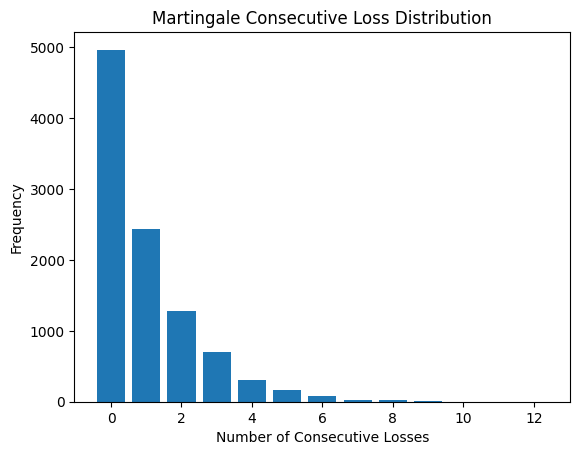

In [62]:
import random
import matplotlib.pyplot as plt

def martingale_loss_distribution(win_prob, num_rounds):
    loss_distribution = {}

    for _ in range(num_rounds):
        consecutive_losses = 0
        while True:
            # Simulate the bet outcome based on win probability
            win = random.random() < win_prob

            if win:
                break  # Exit loop if win occurs
            else:
                consecutive_losses += 1

        # Update the loss distribution
        if consecutive_losses in loss_distribution:
            loss_distribution[consecutive_losses] += 1
        else:
            loss_distribution[consecutive_losses] = 1

    return loss_distribution

# Parameters
win_prob = 0.5
num_rounds = 10000

# Calculate loss distribution
loss_distribution = martingale_loss_distribution(win_prob, num_rounds)

# Plot the distribution
plt.bar(loss_distribution.keys(), loss_distribution.values())
plt.xlabel('Number of Consecutive Losses')
plt.ylabel('Frequency')
plt.title('Martingale Consecutive Loss Distribution')
plt.show()


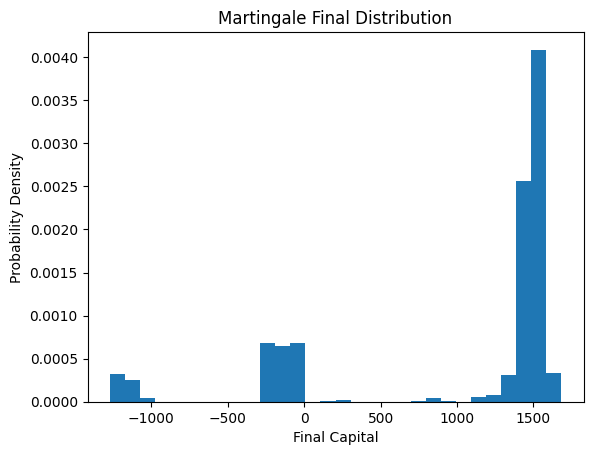

In [67]:
import random
import matplotlib.pyplot as plt

def martingale_final_distribution(initial_capital, initial_bet, win_prob, num_rounds, num_simulations):
    final_distribution = []

    for _ in range(num_simulations):
        capital = initial_capital
        bet = initial_bet

        for _ in range(num_rounds):
            # Simulate the bet outcome based on win probability
            win = random.random() < win_prob

            if win:
                capital += bet
                bet = initial_bet  # Reset bet size
            else:
                capital -= bet
                bet *= 2  # Double the bet size for the next round

            # If capital drops to zero, break the loop
            if capital <= 0:
                break

        final_distribution.append(capital)

    return final_distribution

# Parameters
initial_capital = 1000
initial_bet = 10
win_prob = 0.5
num_rounds = 100
num_simulations = 10000

# Calculate final distribution
final_distribution = martingale_final_distribution(initial_capital, initial_bet, win_prob, num_rounds, num_simulations)

# Plot the distribution
plt.hist(final_distribution, bins=30, density=True)
plt.xlabel('Final Capital')
plt.ylabel('Probability Density')
plt.title('Martingale Final Distribution')
plt.show()


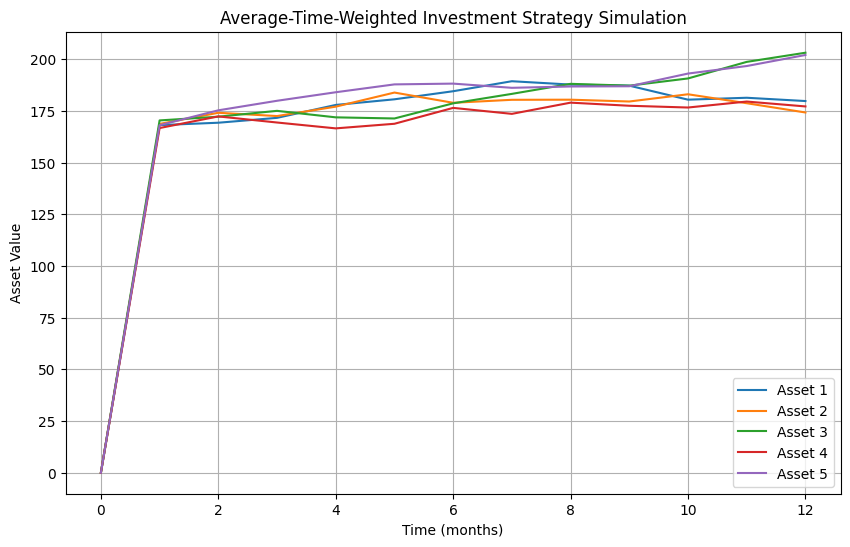

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def average_time_weighted_investment(num_assets, initial_investment, investment_interval, num_intervals, price_change_mean, price_change_std):
    # Initialize asset prices
    asset_prices = np.ones(num_assets)  # Start with a price of 1 for each asset

    # Track total value of each asset and total time each asset has been held
    asset_values = np.zeros((num_intervals + 1, num_assets))
    asset_hold_times = np.zeros(num_assets)

    for t in range(1, num_intervals + 1):
        # Simulate price changes for each asset
        price_changes = np.random.normal(price_change_mean, price_change_std, num_assets)
        asset_prices *= 1 + price_changes

        # Calculate total value of each asset
        asset_values[t] = asset_prices * (initial_investment / num_assets)

        # Update hold times for each asset
        asset_hold_times += investment_interval

    return asset_values / asset_hold_times

# Parameters
num_assets = 5
initial_investment = 10000
investment_interval = 1  # Invest every month
num_intervals = 12  # Simulate for 1 year
price_change_mean = 0.01  # Mean monthly price change (1%)
price_change_std = 0.02   # Standard deviation of monthly price change (2%)

# Simulate average-time-weighted investment strategy
asset_values = average_time_weighted_investment(num_assets, initial_investment, investment_interval, num_intervals, price_change_mean, price_change_std)

# Visualize results
plt.figure(figsize=(10, 6))
for i in range(num_assets):
    plt.plot(asset_values[:, i], label=f'Asset {i+1}')

plt.xlabel('Time (months)')
plt.ylabel('Asset Value')
plt.title('Average-Time-Weighted Investment Strategy Simulation')
plt.legend()
plt.grid(True)
plt.show()
